In [3]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [4]:
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.kernel_ridge import KernelRidge

def kernel_ridge_rbf(X_train, X_test, y_train, y_test, alpha=1.0, gamma=0.1):

    # Create Kernel Ridge model with RBF kernel
    model = KernelRidge(kernel='rbf', alpha=alpha, gamma=gamma)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data (optional, can be used later for evaluation)
    y_pred = model.predict(X_test)

    return model

# مدل Dense
def create_dense_model(input_dim):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # لایه خروجی برای رگرسیون (خروجی پیوسته)

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# بارگذاری دیتاست California Housing
data = fetch_california_housing()
X = data.data  # ویژگی‌ها
y = data.target  # برچسب‌ها (قیمت خانه‌ها)

# تقسیم داده‌ها به مجموعه آموزش و تست (80% آموزش و 20% تست)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ایجاد مدل‌های Dense و RBF
dense_model = create_dense_model(X_train.shape[1])
rbf_model = kernel_ridge_rbf(X_train_scaled, X_test_scaled, y_train, y_test, alpha=1.0, gamma=0.1)

# آموزش مدل Dense
dense_history = dense_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# آموزش مدل RBF
rbf_history = rbf_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# ارزیابی مدل Dense بر روی داده‌های تست
dense_loss = dense_model.evaluate(X_test, y_test)
print(f'Dense Model Loss (MSE) on Test Set: {dense_loss}')

# ارزیابی مدل RBF بر روی داده‌های تست
rbf_loss = rbf_model.evaluate(X_test, y_test)
print(f'RBF Model Loss (MSE) on Test Set: {rbf_loss}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


NameError: name 'X_train_scaled' is not defined

In [ ]:
# تابع RBF
def rbf_kernel(X, centers, gamma=1.0):
    # محاسبه فاصله بین ورودی‌ها و مراکز
    pairwise_dists = tf.sqrt(tf.reduce_sum(tf.square(tf.expand_dims(X, axis=1) - centers), axis=2))  # فاصله بین هر ورودی و مراکز
    return tf.exp(-gamma * pairwise_dists)  # تابع RBF

# مدل شبکه عصبی با لایه RBF
def create_rbf_model(input_dim, num_centers, gamma=1.0):
    model = models.Sequential()

    # لایه ورودی
    model.add(layers.InputLayer(input_shape=(input_dim,)))

    # لایه RBF: اعمال تابع RBF با مراکز تصادفی
    centers = np.random.randn(num_centers, input_dim)  # انتخاب تصادفی مراکز RBF
    model.add(layers.Lambda(lambda x: rbf_kernel(x, tf.constant(centers, dtype=tf.float32), gamma)))

    # لایه خروجی
    model.add(layers.Lambda(lambda x: tf.reduce_sum(x, axis=1, keepdims=True)))  # جمع خروجی‌ها برای پیش‌بینی

    # کامپایل مدل با استفاده از Adam و MSE به عنوان تابع از دست دادن
    model.compile(optimizer='adam', loss='mse')

    return model

# فرض کنید ویژگی‌های ورودی 8 بعدی باشد (بر اساس دیتاست California Housing)
input_dim = X_train.shape[1]  # تعداد ویژگی‌ها
num_centers = 10  # تعداد مراکز در لایه RBF

# ایجاد مدل
rbf_model = create_rbf_model(input_dim, num_centers)

# نمایش مدل
rbf_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ایجاد مدل شبکه عصبی ساده با لایه Dense
def create_dense_model(input_dim):
    model = models.Sequential()

    # لایه ورودی و پنهان اول
    model.add(layers.Dense(64, activation='relu', input_shape=(input_dim,)))

    # لایه پنهان دوم
    model.add(layers.Dense(32, activation='relu'))

    # لایه خروجی
    model.add(layers.Dense(1, activation='linear'))

    # کامپایل مدل
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

# تعداد ویژگی‌های ورودی
input_dim = X_train.shape[1]

# ایجاد مدل
dense_model = create_dense_model(input_dim)

# نمایش معماری مدل
dense_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# تابع RBF
def rbf_kernel(X, centers, gamma=1.0):
    # محاسبه فاصله بین ورودی‌ها و مراکز
    pairwise_dists = tf.sqrt(tf.reduce_sum(tf.square(tf.expand_dims(X, axis=1) - centers), axis=2))  # فاصله بین هر ورودی و مراکز
    return tf.exp(-gamma * pairwise_dists)  # تابع RBF

# مدل شبکه عصبی با لایه RBF به عنوان لایه پنهان
def create_rbf_model(input_dim, num_centers, gamma=1.0, output_dim=1):
    model = models.Sequential()

    # لایه ورودی
    model.add(layers.InputLayer(input_shape=(input_dim,)))

    # لایه RBF: اعمال تابع RBF با مراکز تصادفی
    centers = np.random.randn(num_centers, input_dim)  # انتخاب تصادفی مراکز RBF
    model.add(layers.Lambda(lambda x: rbf_kernel(x, tf.constant(centers, dtype=tf.float32), gamma)))

    # لایه خروجی
    model.add(layers.Dense(output_dim))  # لایه خروجی برای پیش‌بینی (برای رگرسیون)

    # کامپایل مدل
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# ایجاد داده‌های تصادفی برای تست مدل (در اینجا از داده‌های تصادفی استفاده می‌کنیم)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# تقسیم داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ایجاد مدل با 10 مرکز در لایه RBF
input_dim = X_train.shape[1]  # تعداد ویژگی‌ها
num_centers = 10  # تعداد مراکز RBF
model = create_rbf_model(input_dim, num_centers)

# نمایش خلاصه مدل
model.summary()

# آموزش مدل
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# ارزیابی مدل
loss = model.evaluate(X_test, y_test)
print(f'Loss on test set: {loss}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5121   
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4799 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4641 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4238 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4059  
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3830  
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3840 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3584 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3558 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3101  
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3173 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3107  
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3037  
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2965  
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.29

Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6879
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.7123
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6598
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6703
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6157
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6970
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6879
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6676
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.5833
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6612
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.7289
Epoch 12/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6575
Epoch 13/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.7322
Epoch 14/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6120
Epoch 15/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

RBF Model Loss (MSE): 3.760380983352661
Dense Model Loss (MSE): 0.26264724135398865


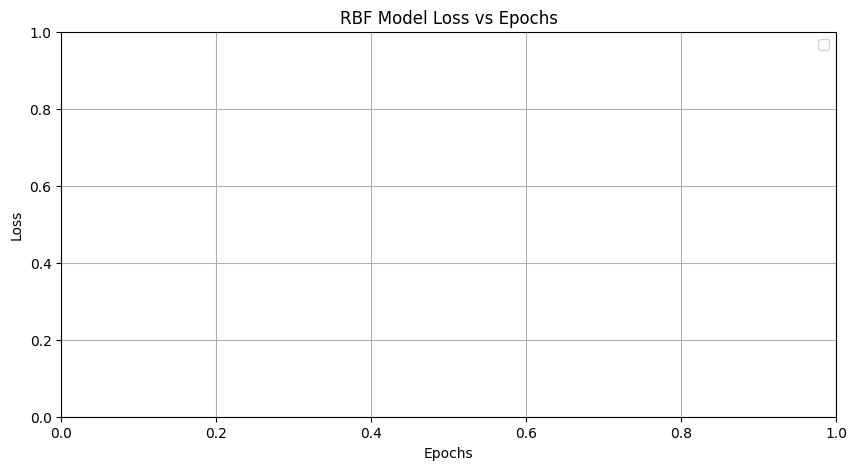

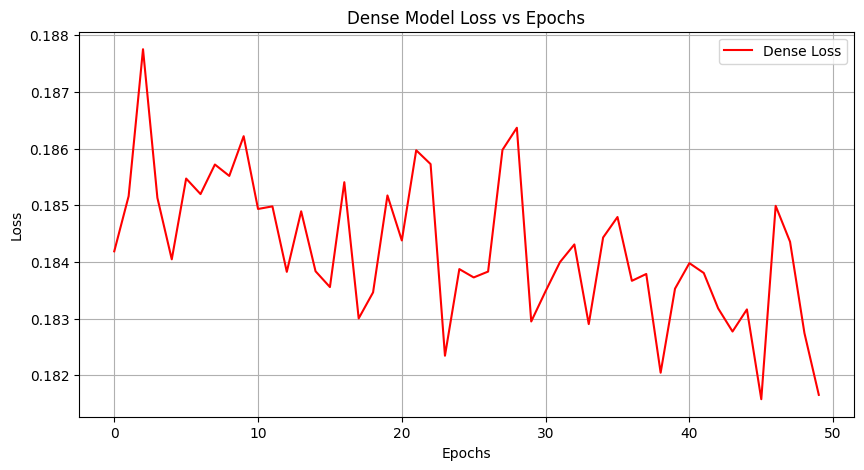

In [ ]:
# فرض می‌کنیم که مقادیر loss در طول دوران آموزش در تاریخچه مدل‌ها ذخیره شده‌اند
rbf_history = rbf_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
dense_history = dense_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# ارزیابی مدل RBF روی مجموعه تست
rbf_loss = rbf_model.evaluate(X_test, y_test, verbose=1)
# ارزیابی مدل Dense روی مجموعه تست
dense_loss, dense_mae = dense_model.evaluate(X_test, y_test, verbose=1)


print(f'RBF Model Loss (MSE): {rbf_loss}')
print(f'Dense Model Loss (MSE): {dense_loss}')


plt.figure(figsize=(10, 5))

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RBF Model Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# رسم نمودار برای مدل Dense
plt.figure(figsize=(10, 5))
plt.plot(dense_history.history['loss'], label='Dense Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Dense Model Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()
